<a href="https://colab.research.google.com/github/sheershsaxena/DataScience-projects/blob/main/PROJECT_01_GLOBAL_TERRORISM_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GLOBAL TERRORISM ANALYSIS**

# **INTRODUCTION** :

Hello, my name is Sheersh Saxena. I have been given a dataset about global terrorism. The dataset contains information about over 180,000 terrorist attacks that occurred worldwide between 1970 and 2017. My task is to analyze and explore the data to identify significant patterns and trends related to terrorist activities. I am excited to work on this project and hope to gain valuable insights from the dataset.

# **PROJECT SPECIFICATIONS** :

**PROJECT NAME** : Global Terrorism Analysis

**PROJECT TYPE** : EDA (Exploratory Data Analysis)

**CONTRIBUTION** : Individual

**PROJECT DESCRIPTION** :

The GLOBAL TERRORISM DATASET [EDA] is a project focused on exploring and analyzing a comprehensive dataset that contains information about terrorist attacks worldwide. The dataset includes details about the location, type, and severity of each attack, as well as information about the groups responsible and their motives. The goal of this project is to use exploratory data analysis (EDA) techniques to gain insights into patterns and trends in terrorist activity, and to provide a better understanding of the global impact of terrorism. This information can be used to inform policy decisions and counterterrorism strategies aimed at preventing future attacks.




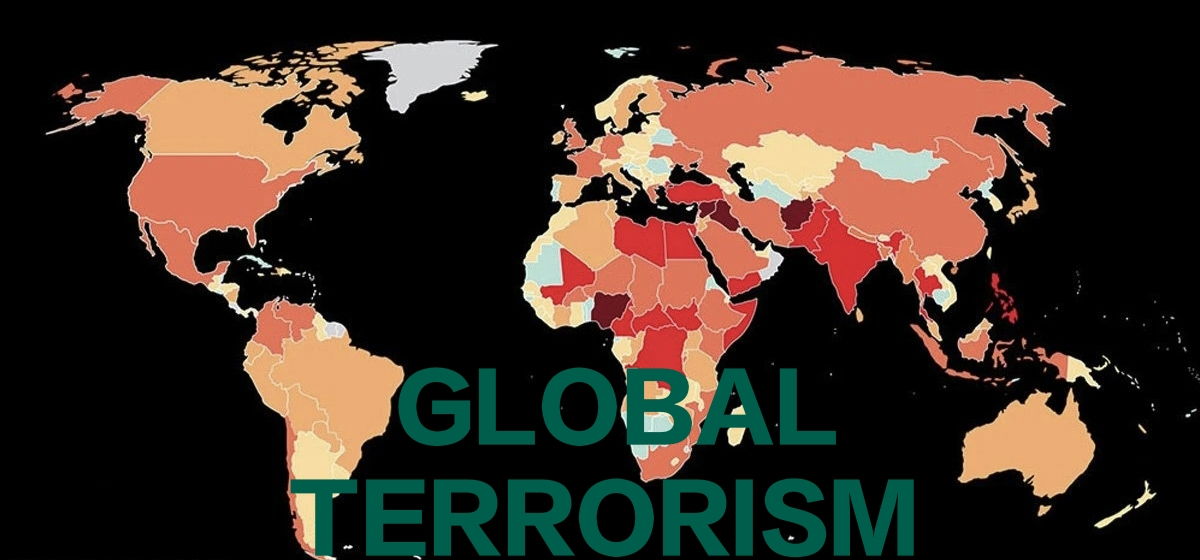

# **PROBLEM STATEMENT** :

Despite efforts to combat global terrorism, there remains a significant lack of comprehensive data and analysis on key trends and patterns, including the success rates of attacks by year, the regions with the highest number of casualties, the most vulnerable target types, changes in the number of attacks and deaths over time, and the distribution of success rates. This hinders our ability to effectively predict, prevent, and respond to future attacks and undermines global security and stability. Without a better understanding of these trends, it is difficult to allocate resources, prioritize counterterrorism efforts, and develop effective strategies to combat terrorism.

# **GITHUB LINK** :

https://github.com/sheershsaxena/DataScience-projects/blob/main/PROJECT%2001%20_%20GLOBAL%20TERRORISM%20ANALYSIS.ipynb

# **LET'S CODE** :

###Importing Libraries

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors


###Dataset Loading

In [ ]:
# CONNECTING MY COLLAB NOTEBOOK WITH MY GOOGLE DRIVE TO ACCESS DATASETS STORED IN MY DRIVE
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# STORING THE DATA SET IN A VARIABLE NAMED (data)
data = pd.read_csv('/content/Global Terrorism Data.csv',encoding='latin-1')


<ipython-input-3-22469dd032cd>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Global Terrorism Data.csv',encoding='latin-1')


## ( Problem 1 : Encoding Error ) :


If you're getting an error with the 'latin-1' encoding, you can try some of the other common encodings like 'utf-8', 'utf-16', or 'cp1252'. 
 
Encoding errors can occur when reading in text data from a file that was saved in a different character encoding than the one that is being used to read the file.For example, if a file was saved in a character encoding like 'ISO-8859-1' and you try to read it using the default 'UTF-8' encoding, you may encounter encoding errors because some characters may not be properly translated.

In such cases, you may need to explicitly specify the encoding of the file using the 'encoding' parameter of the read_csv() function to ensure that the text data is properly interpreted and read into memory.

#........................................................................................................................................................................................................................................................................................................

## **COLLECTING SOME INFORMATION ABOUT THE DATA**

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# DATA ROWS AND COLUMN COUNT 
data.shape

(181691, 135)

In [ ]:
# DATASET INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# NAME OF THE COLUMNS IN THE DATASET.
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#........................................................................................................................................................................................................................................................................................................

##**DATA CLEANING**

<Axes: >

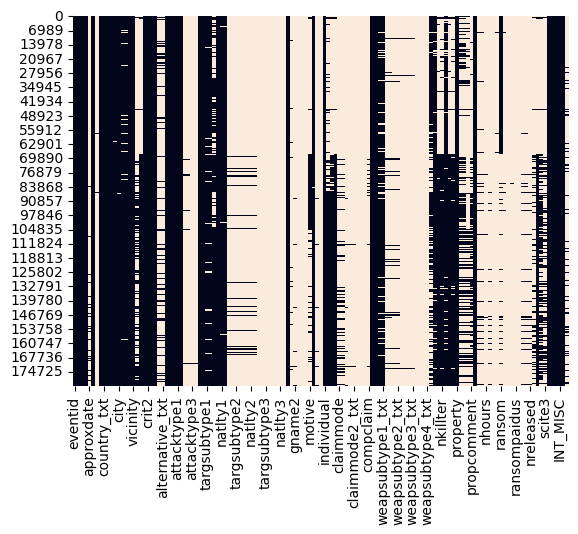

In [ ]:
#CHECKING FOR MISSING VALUES IN THE DATASET
sns.heatmap(data.isnull(), cbar=False)

In [ ]:
#The .fillna() method in pandas is used to replace any missing or NaN (Not a Number) values in a dataframe or series with a specified value.
# In the given code data['weaptype1_txt'] = data['weaptype1_txt'].fillna(''),
# it is replacing any missing or NaN values in the weaptype1_txt column of the data dataframe with an empty string ''. 

data['weaptype1_txt'] = data['weaptype1_txt'].fillna('')
data['weaptype2_txt'] = data['weaptype2_txt'].fillna('')
data['weaptype3_txt'] = data['weaptype3_txt'].fillna('')

#CONCATENATION

data['WEAPONRY'] = data['weaptype1_txt'] + data['weaptype2_txt'] + data['weaptype3_txt'] 
data['WEAPONRY']


0            Unknown
1            Unknown
2            Unknown
3         Explosives
4         Incendiary
             ...    
181686      Firearms
181687    Explosives
181688    Incendiary
181689    Explosives
181690    Explosives
Name: WEAPONRY, Length: 181691, dtype: object

In [ ]:
data['targtype1_txt'] = data['targtype1_txt'].fillna('')
data['targtype2_txt'] = data['targtype2_txt'].fillna('')
data['targtype3_txt'] = data['targtype3_txt'].fillna('')

data['TARGET'] = data['targtype1_txt'] + data['targtype2_txt'] + data['targtype3_txt']
data['TARGET']


0         Private Citizens & Property
1             Government (Diplomatic)
2                 Journalists & Media
3             Government (Diplomatic)
4             Government (Diplomatic)
                     ...             
181686                       Military
181687                       Military
181688    Private Citizens & Property
181689           Government (General)
181690                        Unknown
Name: TARGET, Length: 181691, dtype: object

In [ ]:
data['natlty1_txt'] = data['natlty1_txt'].fillna('')
data['natlty2_txt'] = data['natlty2_txt'].fillna('')
data['natlty3_txt'] = data['natlty3_txt'].fillna('')
data['VICTIM_NATIONALITY'] = data['natlty1_txt'] + data['natlty2_txt'] + data['natlty3_txt']
data['VICTIM_NATIONALITY']

0         Dominican Republic
1                    Belgium
2              United States
3              United States
4              United States
                 ...        
181686               Somalia
181687                Russia
181688           Philippines
181689                 India
181690           Philippines
Name: VICTIM_NATIONALITY, Length: 181691, dtype: object

## ( Problem 2 : Tackling the missing values in the given columns )

Unless and until we do not tackle with the problem of missing values we will not be able to concatenate the coulumns.

After concatenation we get 3 complete columns containing information about weaponry , target type , victim nationality.

In [ ]:
# SELECTING THE IMPORTANT USEFUL COLUMNS FROM THE DATASET
dataset = data.loc[ : ,['iyear','imonth','country_txt','region_txt','success','attacktype1_txt','TARGET','VICTIM_NATIONALITY','gname','WEAPONRY','nkill','nwound','property']]
dataset


,iyear,imonth,country_txt,region_txt,success,attacktype1_txt,TARGET,VICTIM_NATIONALITY,gname,WEAPONRY,nkill,nwound,property
0,1970,7,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,0
1,1970,0,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,0
2,1970,1,Philippines,Southeast Asia,1,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,0
3,1970,1,Greece,Western Europe,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,NaN,NaN,1
4,1970,1,Japan,East Asia,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,Sub-Saharan Africa,1,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,1.0,2.0,-9
181687,2017,12,Syria,Middle East & North Africa,1,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,2.0,7.0,1
181688,2017,12,Philippines,Southeast Asia,1,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0,1
181689,2017,12,India,South Asia,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,0.0,0.0,-9


In [ ]:
#RENAMING THE COLUMNS
dataset.columns=['YEAR','MONTH','TARGET_COUNTRY','TARGET_REGION','ATTACK_SUCCESS','ATTACK_TYPE','TARGET','VICTIM_NATIONALITY','ORGANIZATION','WEAPONRY','KILL_COUNT','WOUNDED','PROPERTY_DAMAGE']

<Axes: >

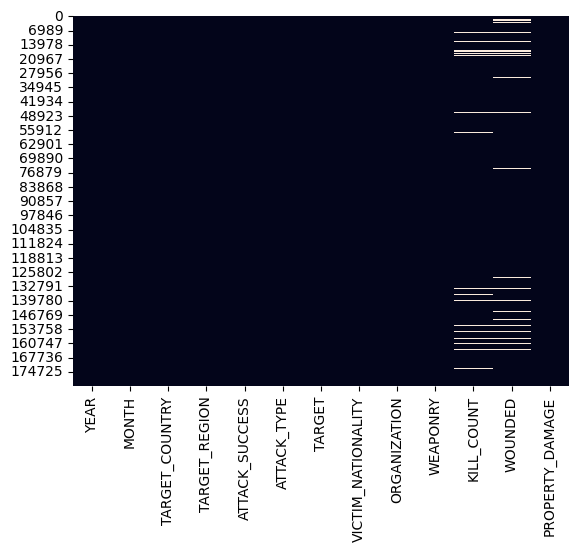

In [ ]:
#CHECKING FOR MISSING VALUES IN THE DATASET
sns.heatmap(dataset.isnull(), cbar=False)

In [ ]:
#REPLACING THE MISSING VALUES WITH SOME VALUE AND MAKING CHANGES PERMANENT
dataset.fillna(0.01,inplace=True)

In [ ]:
#UNDERSTANDING THE GIVEN VARIABLES
dataset.describe(include = 'all')

,YEAR,MONTH,TARGET_COUNTRY,TARGET_REGION,ATTACK_SUCCESS,ATTACK_TYPE,TARGET,VICTIM_NATIONALITY,ORGANIZATION,WEAPONRY,KILL_COUNT,WOUNDED,PROPERTY_DAMAGE
count,181691.000000,181691.000000,181691,181691,181691.000000,181691,181691,181691,181691,181691,181691.000000,181691.000000,181691.000000
unique,NaN,NaN,205,12,NaN,9,665,1308,3537,209,NaN,NaN,NaN
top,NaN,NaN,Iraq,Middle East & North Africa,NaN,Bombing/Explosion,Private Citizens & Property,Iraq,Unknown,Explosives,NaN,NaN,NaN
freq,NaN,NaN,24636,50474,NaN,88255,42230,22354,82782,85750,NaN,NaN,NaN
mean,2002.638997,6.467277,NaN,NaN,0.889598,NaN,NaN,NaN,NaN,NaN,2.267427,2.884194,-0.544556
std,13.259430,3.388303,NaN,NaN,0.313391,NaN,NaN,NaN,NaN,NaN,11.226943,34.309672,3.122889
min,1970.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-9.000000
25%,1991.000000,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.010000,0.000000,1.000000
75%,2014.000000,9.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000


###Short descriptions for each column in the dataset:

- YEAR : The year in which the terrorist attack occurred between 1970-2017.

- MONTH : The month in which the terrorist attack occurred.
- TARGET_COUNTRY : The country where the attack was carried out.
- TARGET_REGION : The World is divided into 12 regions each containing different countries where the attack was carried out.
- ATTACK_SUCCESS : A binary variable indicating whether the attack was successful or not.
- ATTACK_TYPE : The type of attack carried out (e.g., bombing, armed assault, hijacking, etc.).
- TARGET : The specific target of the attack (e.g., government building, military personnel, civilians, etc.).
- VICTIM_NATIONALITY : The nationality of the individuals or group targeted in the attack.
- ORGANIZATION : The terrorist group responsible for carrying out the attack.
- WEAPONRY : The type of weapon used in the attack.
- KILL_COUNT : The number of individuals killed in the attack.
- WOUNDED : The number of individuals injured in the attack.
- PROPERTY_DAMAGE : The extent of the damage to property caused by the attack.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                181691 non-null  int64  
 1   MONTH               181691 non-null  int64  
 2   TARGET_COUNTRY      181691 non-null  object 
 3   TARGET_REGION       181691 non-null  object 
 4   ATTACK_SUCCESS      181691 non-null  int64  
 5   ATTACK_TYPE         181691 non-null  object 
 6   TARGET              181691 non-null  object 
 7   VICTIM_NATIONALITY  181691 non-null  object 
 8   ORGANIZATION        181691 non-null  object 
 9   WEAPONRY            181691 non-null  object 
 10  KILL_COUNT          181691 non-null  float64
 11  WOUNDED             181691 non-null  float64
 12  PROPERTY_DAMAGE     181691 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 18.0+ MB


In [ ]:
dataset.head()

,YEAR,MONTH,TARGET_COUNTRY,TARGET_REGION,ATTACK_SUCCESS,ATTACK_TYPE,TARGET,VICTIM_NATIONALITY,ORGANIZATION,WEAPONRY,KILL_COUNT,WOUNDED,PROPERTY_DAMAGE
0,1970,7,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.00,0.00,0
1,1970,0,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.00,0.00,0
2,1970,1,Philippines,Southeast Asia,1,Assassination,Journalists & Media,United States,Unknown,Unknown,1.00,0.00,0
3,1970,1,Greece,Western Europe,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,0.01,0.01,1
4,1970,1,Japan,East Asia,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0.01,0.01,1


In [ ]:
dataset.tail()

,YEAR,MONTH,TARGET_COUNTRY,TARGET_REGION,ATTACK_SUCCESS,ATTACK_TYPE,TARGET,VICTIM_NATIONALITY,ORGANIZATION,WEAPONRY,KILL_COUNT,WOUNDED,PROPERTY_DAMAGE
181686,2017,12,Somalia,Sub-Saharan Africa,1,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,1.0,2.0,-9
181687,2017,12,Syria,Middle East & North Africa,1,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,2.0,7.0,1
181688,2017,12,Philippines,Southeast Asia,1,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0,1
181689,2017,12,India,South Asia,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,0.0,0.0,-9
181690,2017,12,Philippines,Southeast Asia,0,Bombing/Explosion,Unknown,Philippines,Unknown,Explosives,0.0,0.0,0


### What is the data all about:

The refined dataset is a collection of records that contain information on terrorist attacks worldwide. The dataset consist of information about terrorist attacks in 12 regions comprised of 205 countries within the span of 47 years i.e. between 1970-2017. The dataset also provides us the information about weaponry used , terrorist organizations involved and the damage caused. My aim is to extract relevant information and the trends seen in the attacks worldwide and make the data handy for stakeholders like Government, Anti terrorist units, Intelligence units , General public, etc. 

#........................................................................................................................................................................................................................................................................................................

##**QUESTIONS**:

### 1 ) When initially looking at the data a pretty immediate question I wanted an answer for was how many terrorist attacks occurred in our datasets timeline?

A Stem plot is used to depict the year wise trend (rising or falling) of terrorist attacks .

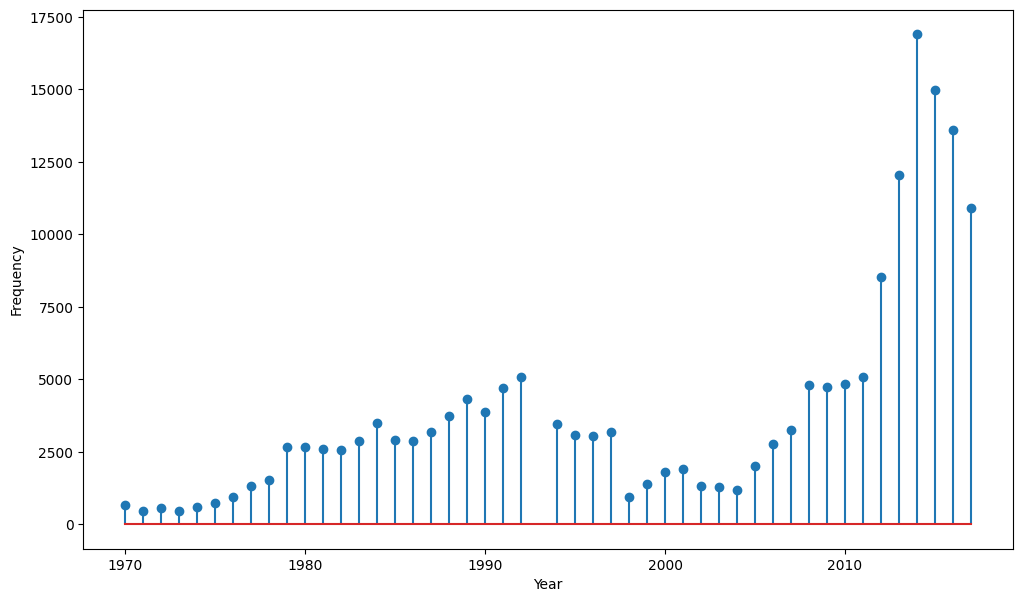

In [ ]:
# Get the value counts for the "YEAR" column and sort them in ascending order
value_counts = dataset["YEAR"].value_counts().sort_index()

# Create a stem plot of the value counts
plt.figure(figsize=(12,7))
plt.stem(value_counts.index, value_counts.values)

# Set the x-axis label and y-axis label
plt.xlabel("Year")
plt.ylabel("Frequency")

# Show the plot
plt.show()


*  We can see here that attacks slowly start to increase from 1973 until about 1992 from where till 2003 we see a downward global trend in Terrorist incidents despite events like September 11, 2001.
*  Again from 2004-05 we can see a rise in number of terrorist attacks, rising exponentially after 2011 reaching its peak in 2014.
*  After 2014 a downward trend can be observed. 

#........................................................................................................................................................................................................................................................................................................

### 2) Next very obvious question that I was curious to get an answer for, was, the name of the organizations that are frequently after these global attacks.  

Visualization done using pie chart because it is easy to show the proportion of each organization in the list of total 3537 different terrorist organizations using a piechart. 

In [ ]:
# Get the value counts for the "ORGANIZATION" column and select the top 50 organizatons.
Active_org = dataset[['ORGANIZATION']].value_counts()
Active_org.head(50)

ORGANIZATION                                               
Unknown                                                        82782
Taliban                                                         7478
Islamic State of Iraq and the Levant (ISIL)                     5613
Shining Path (SL)                                               4555
Farabundo Marti National Liberation Front (FMLN)                3351
Al-Shabaab                                                      3288
New People's Army (NPA)                                         2772
Irish Republican Army (IRA)                                     2671
Revolutionary Armed Forces of Colombia (FARC)                   2487
Boko Haram                                                      2418
Kurdistan Workers' Party (PKK)                                  2310
Basque Fatherland and Freedom (ETA)                             2024
Communist Party of India - Maoist (CPI-Maoist)                  1878
Maoists                                    

In [ ]:
# Better to take frequency above 500 as we are considering data of 47 years.
Active_org_filtered = Active_org.loc[Active_org > 500]

In [ ]:
Active_org_filtered

ORGANIZATION                                    
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakist

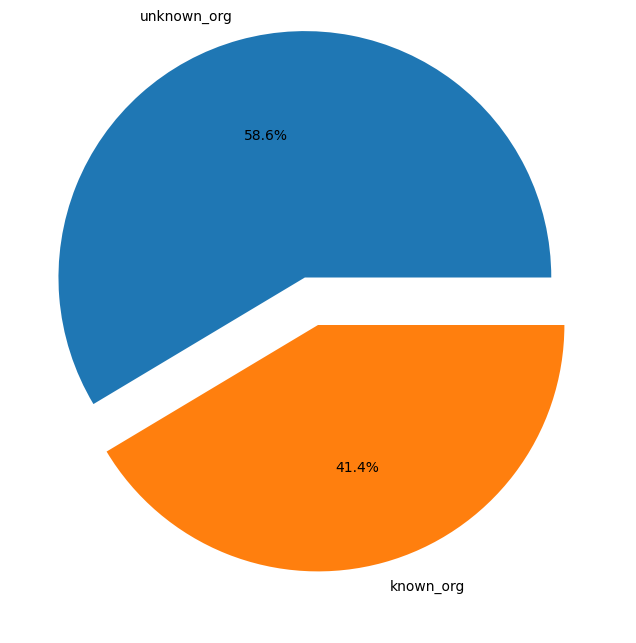

In [ ]:
# unknown is the first row of the filtered DataFrame(Active_org_filtered).
unknown = Active_org_filtered.iloc[0]

# known is the sum of all the rows in Active_org_filtered excluding the first row.
# This would give us the total count of organizations with known attributes.
known = Active_org_filtered.iloc[1 : ].sum()

# color_list is a list of color codes from the TABLEAU_COLORS palette that will be used to color the pie chart.
color_list = colors.TABLEAU_COLORS

# explode is a list of values indicating how much each slice of the pie chart should be separated from the center.
#In this case, the first slice will be separated by 20% of the radius of the chart, while all other slices will be centered.
explode = [0.2] + [0] 

# Adjusting the size of the pie chart
fig = plt.figure(figsize=(8,8))

# Create the pie chart
plt.pie([unknown , known],labels=['unknown_org','known_org'], colors=color_list, explode=explode, autopct='%1.1f%%')
#autopct='%1.1f%%' specifies how the percentage values for each slice should be formatted.

plt.show()




#......................................................................................................

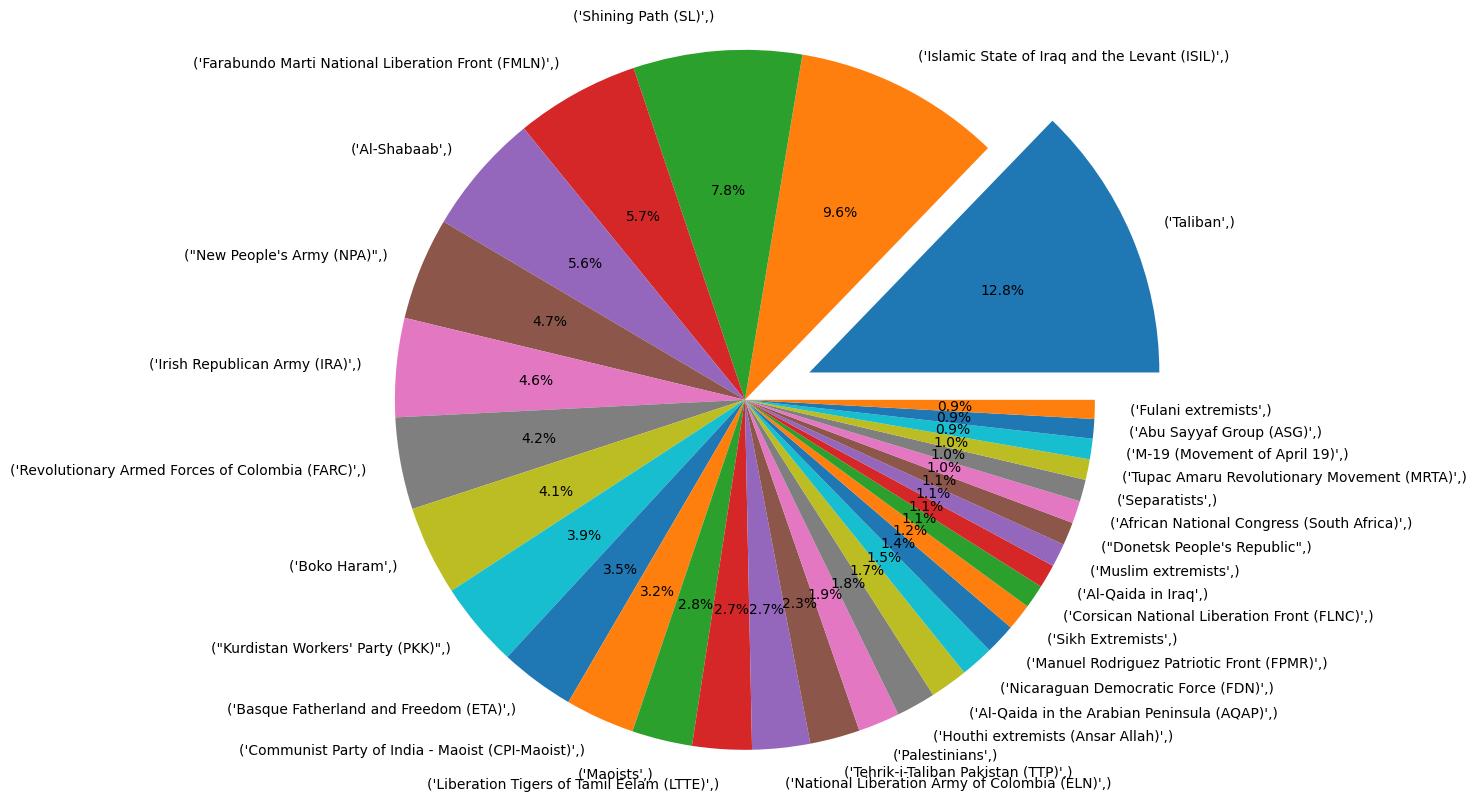

In [ ]:
# Filter to only include units with a frequency of more than 500
Active_org_filtered = Active_org.loc[Active_org > 500]

# Dropping the first row
Active_org_filtered1 = Active_org_filtered.iloc[1:]

# Create a list of colors for the pie chart
color_list = colors.TABLEAU_COLORS

# Create a list of explode values for the pie chart
explode = [0.2] + [0] * (len(Active_org_filtered1) - 1)

# Adjusting the size of the pie chart
fig = plt.figure(figsize=(15, 10))

# Create the pie chart
plt.pie(Active_org_filtered1, labels=Active_org_filtered1.index, colors=color_list, explode=explode, autopct='%1.1f%%')

# To keep the chart a complete circle
plt.axis('equal')

plt.show()


 We have no information about the organizations behind 58.6% of the total attacks made. Whereas , out of the rest 41.4% , 50% of the attacks were made by top 7 (out of 3537) organizations , named : 
 *  Taliban 
 *  ISIL 
 *  Shining Path
 *  FMLN
 *  Al Shabaab
 *  NPA 
 *  IRA.

#........................................................................................................................................................................................................................................................................................................

### 3)Which organization is causing the maximum damage ?

*  ### a) Damage caused per attack.
*  ### b) Damage caused in total.

Catplot and Scatterplot is used for data visualization as here what i need to show is value of three different variables(kill count, wounded , property damage) per observation(organization). 

### Damage caused per attack.

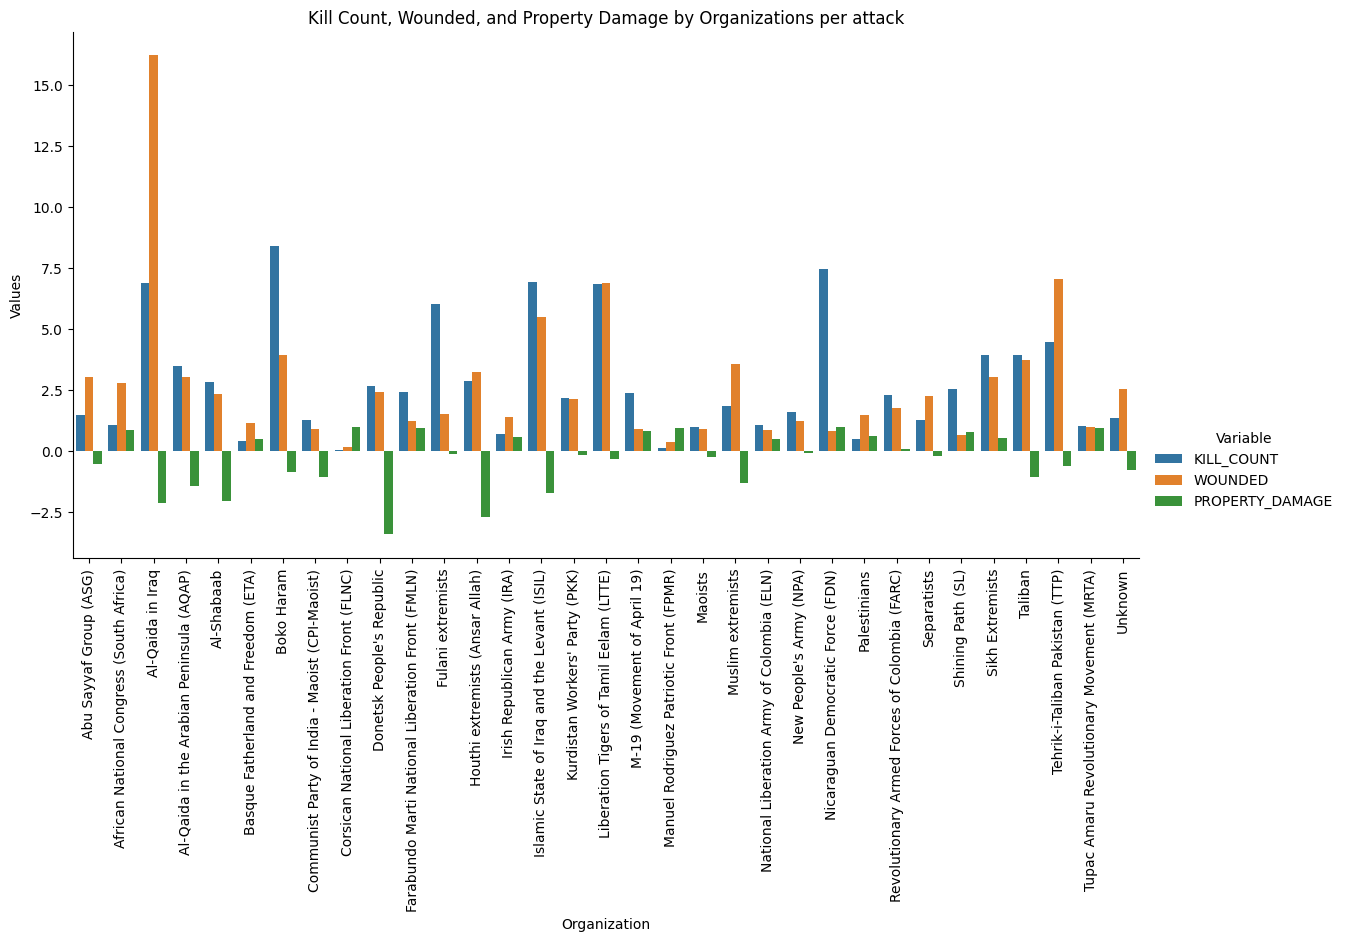

In [ ]:
import seaborn as sns

# Get organizations with frequency > 500
Active_organizations = dataset['ORGANIZATION'].value_counts()[dataset['ORGANIZATION'].value_counts() > 500].index

# This line of code filters the dataset DataFrame to only include rows where the ORGANIZATION column matches 
# one of the organizations in the Active_org_filtered list.
filtered_data = dataset[dataset['ORGANIZATION'].isin(Active_organizations)]

# Group the data by organization and take average of the kill count, wounded, and property damage per attack
org_data = filtered_data.groupby('ORGANIZATION')[['KILL_COUNT', 'WOUNDED', 'PROPERTY_DAMAGE']].mean().reset_index()

# Melt the data to create a long-form dataset
melted_data = pd.melt(org_data, id_vars=['ORGANIZATION'], var_name='Variable', value_name='Value')
# The id_vars parameter specifies which columns should be kept as it is and not melted
# The var_name and value_name parameters specify the names of the columns that will contain the melted variable names and values, respectively.

# Create a catplot using Seaborn
sns.catplot(y='Value', x='ORGANIZATION', hue='Variable', kind='bar', data=melted_data, height=6, aspect=2)

# Set the title and axes labels
plt.title('Kill Count, Wounded, and Property Damage by Organizations per attack')
plt.xlabel('Organization')
plt.ylabel('Values')
plt.xticks(rotation=90)

# Show the plot
plt.show()


The most lethal terrorist organizations in terms of kill count, number of people wounded, property damage per attack are:



*   AL QAIDA (Iraq + Arabian peninsula)
*   BOKO HARAM
*   FULANI EXTREMISTS
*   ISLAMIC STATE OF IRAQ AND LEVANT (ISIL)
*   LIBERATION TIGERS OF TAMIL EELAM (LTTE)
*   NICARAGUAN DEMOCRATIC FORCE (FDN)
*   TEHRIK-I-TALIBAN PAKISTAN (TTP)

Top 3 damage-causing organizations in terms of the number of kills per attack :
*   AL QAIDA (IRAQ + ARAB PENINSULA)
*   BOKO HARAM
*   NICARAGUAN DEMOCRATIC FORCE(FDN)

In [ ]:
melted_data.head(40)

,ORGANIZATION,Variable,Value
0,Abu Sayyaf Group (ASG),KILL_COUNT,1.480683
1,African National Congress (South Africa),KILL_COUNT,1.048550
2,Al-Qaida in Iraq,KILL_COUNT,6.866897
3,Al-Qaida in the Arabian Peninsula (AQAP),KILL_COUNT,3.495461
4,Al-Shabaab,KILL_COUNT,2.839474
5,Basque Fatherland and Freedom (ETA),KILL_COUNT,0.405366
6,Boko Haram,KILL_COUNT,8.407705
7,Communist Party of India - Maoist (CPI-Maoist),KILL_COUNT,1.248222
8,Corsican National Liberation Front (FLNC),KILL_COUNT,0.020720
9,Donetsk People's Republic,KILL_COUNT,2.656170


#.......................................................................................................

### Damage caused in total.

<ipython-input-32-073a3a297503>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  org_data2 = org_data2[dataset['ORGANIZATION'].value_counts() > 500]


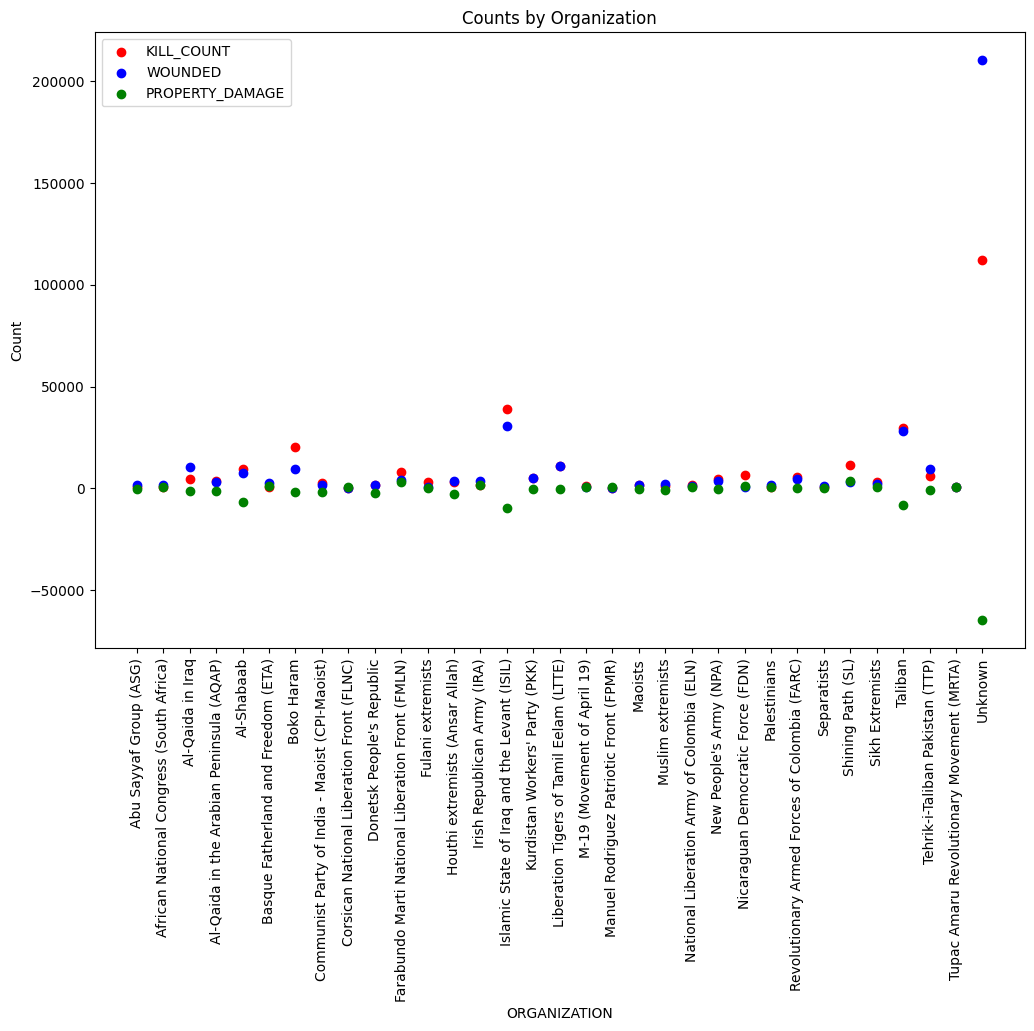

In [ ]:
import matplotlib.pyplot as plt

# Group the data by organization and sum the counts for each category
org_data2 = dataset.groupby('ORGANIZATION')[['KILL_COUNT', 'WOUNDED', 'PROPERTY_DAMAGE']].sum()

# Filter the data to only include organizations with frequency more than 500
org_data2 = org_data2[dataset['ORGANIZATION'].value_counts() > 500]

plt.figure(figsize=(12,8))
# Create the scatter plot
plt.scatter(org_data2.index, org_data2['KILL_COUNT'], color='red', label='KILL_COUNT')
plt.scatter(org_data2.index, org_data2['WOUNDED'], color='blue', label='WOUNDED')
plt.scatter(org_data2.index, org_data2['PROPERTY_DAMAGE'], color='green', label='PROPERTY_DAMAGE')

# Add a legend and labels
plt.legend(loc='upper left')
plt.xlabel('ORGANIZATION')
plt.ylabel('Count')
plt.title('Counts by Organization')
plt.xticks(rotation=90)
# Show the plot
plt.show()


 Top 3 damage causing organizations in terms of the total number of kills :
*   ISLAMIC STATE OF IRAQ AND LEVANT (ISIL)
*   TALIBAN
*   BOKO HARAM

#........................................................................................................................................................................................................................................................................................................

###4) Name of the countries that are the most affected and attacks distribution with respect to countries and region .
*  ### a) Year wise distribution of attack frequency in most affected countries that have witnessed more than 1000 attacks in these 47 years i.e between 1970-2017.

*  ### b) Year wise distribution of attack frequency in different regions of the world.       

A heatmap depicting yearwise distribution of number of attacks in most affected countries .

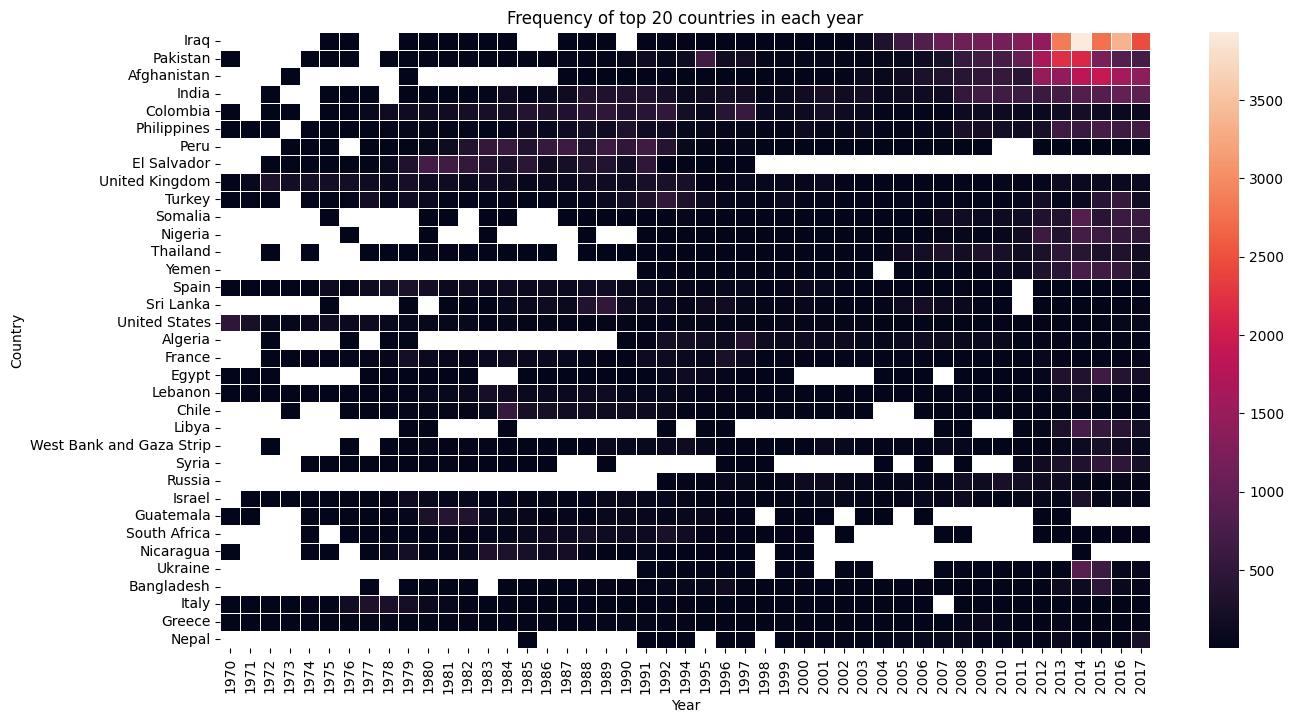

In [ ]:
# select the columns of interest
df = dataset[['YEAR', 'TARGET_COUNTRY']]

country_counts1 = dataset['TARGET_COUNTRY'].value_counts()

# select countries with count more than 1000
selected_countries1 = country_counts1[country_counts1 > 1000].index.tolist()

selected_data1 = dataset[dataset['TARGET_COUNTRY'].isin(selected_countries1)]

# group by year and country, then count the number of attacks for each year and country combination.
mf = selected_data1.groupby(['YEAR', 'TARGET_COUNTRY']).size().reset_index(name='count')

# pivot the data to have years as columns and countries as rows
mf_pivot = mf.pivot(index='TARGET_COUNTRY', columns='YEAR', values='count')

# sort by the total number of attacks in descending order
mf_pivot = mf_pivot.loc[mf_pivot.sum(axis=1).sort_values(ascending=False).index]

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(mf_pivot, annot=False, fmt=".1f", linewidths=.5)
plt.title('Frequency of top 20 countries in each year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


In [ ]:
mf_pivot

YEAR,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
TARGET_COUNTRY,,,,,,,,,,,,,,,,,,,,,
Iraq,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,2.0,...,1106.0,1137.0,1179.0,1308.0,1437.0,2852.0,3933.0,2751.0,3360.0,2466.0
Pakistan,1.0,NaN,NaN,NaN,2.0,2.0,3.0,NaN,2.0,7.0,...,568.0,667.0,713.0,1012.0,1654.0,2215.0,2151.0,1243.0,864.0,719.0
Afghanistan,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,...,414.0,503.0,542.0,421.0,1469.0,1443.0,1824.0,1928.0,1617.0,1414.0
India,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,20.0,...,534.0,672.0,663.0,645.0,611.0,694.0,860.0,884.0,1025.0,966.0
Colombia,1.0,NaN,2.0,6.0,NaN,10.0,22.0,80.0,158.0,140.0,...,133.0,139.0,136.0,94.0,115.0,149.0,231.0,136.0,109.0,117.0
Philippines,10.0,4.0,7.0,NaN,1.0,4.0,10.0,2.0,36.0,50.0,...,276.0,229.0,205.0,151.0,249.0,651.0,597.0,721.0,632.0,692.0
Peru,NaN,NaN,NaN,3.0,3.0,2.0,NaN,4.0,4.0,3.0,...,1.0,4.0,NaN,NaN,6.0,10.0,12.0,10.0,3.0,8.0
El Salvador,NaN,NaN,2.0,1.0,3.0,3.0,13.0,6.0,91.0,326.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,12.0,81.0,292.0,189.0,203.0,194.0,194.0,140.0,100.0,239.0,...,39.0,23.0,57.0,47.0,55.0,137.0,103.0,114.0,105.0,122.0




*   Attacks in IRAQ are on a rise and touched its peak in 2014.
*   AFGHANISTAN and PAKISTAN both the countries witnessed increased attack frequency in 2008-2015 but are currently showing a declining trend.
*   INDIA is showing a continuous upward trend in attack frequency. Attacks in PHILLIPINES are also on a rise.
 

#...........................................................................................

A lineplot depicting the attacks in all these years in each region

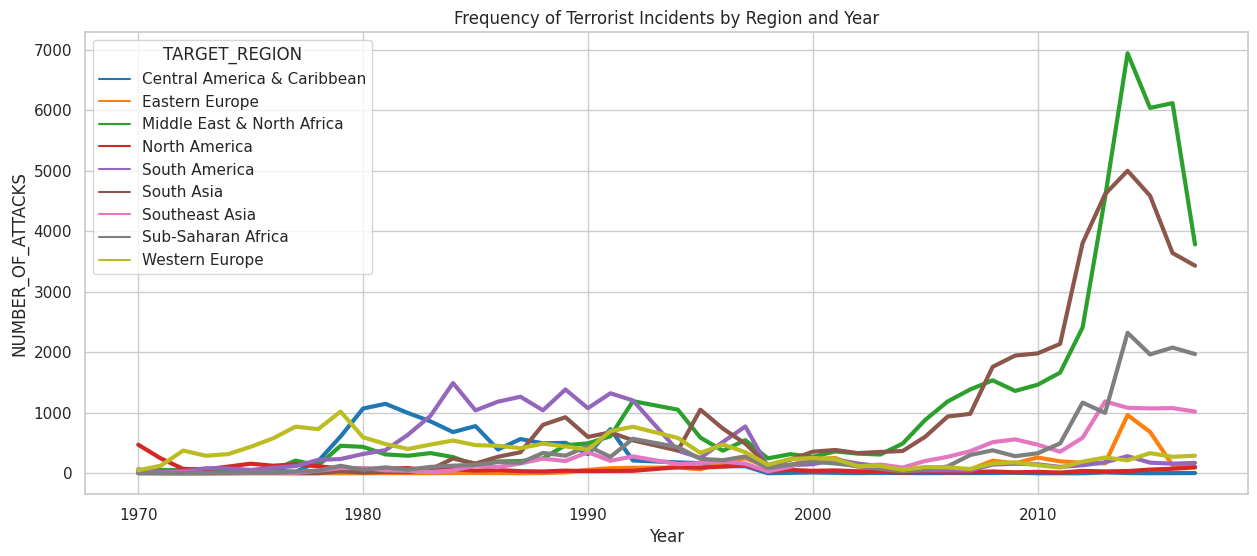

In [ ]:
sns.set_theme(style="whitegrid")

# Get the target region frequency
target_region = dataset[['TARGET_REGION']].value_counts()

# Filter out regions with less than 1000 incidents
target_region = target_region[target_region > 1000]

# Group by region and year
target_region_year = dataset.groupby(['TARGET_REGION', 'YEAR']).size().reset_index(name='NUMBER_OF_ATTACKS')

# Filter out regions with less than 1000 incidents
target_region_year = target_region_year[target_region_year['TARGET_REGION'].isin(target_region.index.get_level_values(0))]

# Set the figure size
plt.figure(figsize=(15,6))

# Create the line plot
sns.lineplot(data=target_region_year, x='YEAR', y='NUMBER_OF_ATTACKS', hue='TARGET_REGION',linewidth =3,palette='tab10' )

# Set the title and axis labels
plt.title('Frequency of Terrorist Incidents by Region and Year')
plt.xlabel('Year')
plt.ylabel('NUMBER_OF_ATTACKS')

# Show the plot
plt.show()


*  Attacks in Middle East , North Africa and South Asia are on a rise showing steep rise after 2010 and a downwards trend after 2014.
*  We can also see a rise in number of attacks in regions like Sub Saharan Africa and Southeast Asia after 2010-2011 but are in declining phase after 2013-2014.
*  A sharp decline in number of attacks is also seen in regions like Central America & Carribean , South America and Western Europe where attacks were touching heights between 1979- 1995. 

#........................................................................................................................................................................................................................................................................................................

### 5) Countries that are the most affected and the type of attacks these countries suffered form ?

Catplot is used to depict the distribution of attack type in most affected countries. 

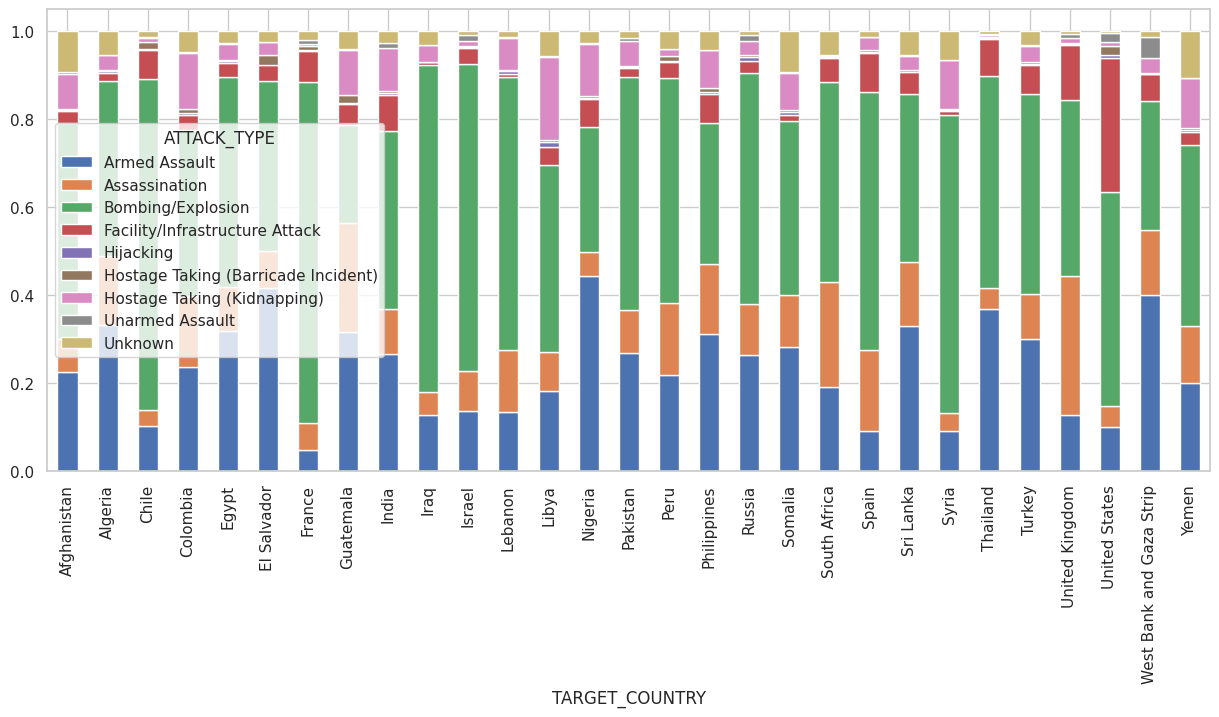

In [ ]:
country_counts = dataset['TARGET_COUNTRY'].value_counts()

# select countries with count more than 2000
selected_countries = country_counts[country_counts > 2000].index

# filter the dataset to include only the selected countries
selected_data = dataset[dataset['TARGET_COUNTRY'].isin(selected_countries)]

# create cross-tabulation of selected data
cross_tab = pd.crosstab(selected_data['TARGET_COUNTRY'], selected_data['ATTACK_TYPE'], normalize='index')

# plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True , figsize=(15,6))
#stacked=True tells the method to stack the bars on top of each other rather than placing them side by side.

plt.show()


PRIME FINDINGS :

* Amongst the total attack types, bombing/explosion was the most prefferd attack type of the terrorist organizations.

* Based on the analysis of the chosen attack types, it has been observed that Bombing, Armed assault, and Assassination collectively account for 83% of the total attacks. This highlights the need for anti-terrorism units and country governments to impose stricter regulations on the imports and circulation of explosive materials. Moreover, the analysis also suggests the need for better regulation of gun policies and license distribution to prevent future incidents of Armed assault and Assassination. These measures are crucial in ensuring the safety and security of citizens, and must be given due consideration by relevant authorities.

* Amongst the targeted countries Iraq,Pakistan,Afghanistan,India suffered the most.

ATTACK TYPE VS COUNTRIES : 

* In countries like : ALGERIA , EL SALVADOR , GAUTEMALA , NIGERIA , PHILLIPINES , SRI LANKA , WEST BANK AND GAZA STRIP;
Armed assault and Assassination together constitues almost 50% of the total attacks . This does not mean that these countries are saved from bombings and explosions as the next half is dominated by bombings. 

* Facility/Infrastructure attacks are seen the most in UNITED STATES.

* Hostage taking is seen the most in countries like LIBYA (North_Africa).
  Other countries in the list are 

  African_countries : Nigeria , Somalia
  
  Asian_countries   : India , Philippines

  Latin_American_countries : Guatemala , Colombia
  
  Middle_East_countries : Yemen , Syria

* Hijacking is seen the most in LIBYA (North_Africa).
  Other countries in the list are
  UNITED STATES
  RUSSIA
  SOMALIA
  EGYPT
  PHILLIPINES

* Bombings/Explosions constitues a significant share in total attack types in almost all the countries but it occupies almost 80-90% of the share in  countries like :
  FRANCE, 
  CHILE, 
  IRAQ

* A lot of attack data from countries like YEMEN , SOMALIA , LIBYA , AFGHANISTAN is unknown.  
  
   
   
  




#........................................................................................................................................................................................................................................................................................................

### 6) Name of the countries that have been attacked by a large number of different terrorist organizations.

Simple Lineplot is used for visualizing the data.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Greece'),
  Text(5, 0, 'Lebanon'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Iraq'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'Israel'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'Bangladesh'),
  Text(15, 0, 'Nepal'),
  Text(16, 0, 'Libya'),
  Text(17, 0, 'Iran'),
  Text(18, 0, 'West Bank and Gaza Strip'),
  Text(19, 0, 'West Germany (FRG)')])

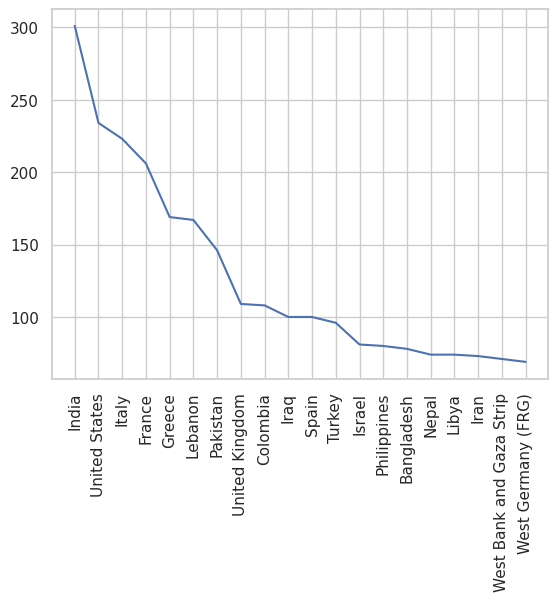

In [ ]:
# Grouping countries with organizations
org_per_country = dataset.groupby('TARGET_COUNTRY')['ORGANIZATION'].nunique()
#.nunique() : it returns the number of unique elements in a pandas Series or DataFrame. 

org_per_country.sort_values(ascending= False , inplace= True)

# Extracting top 20 countries
org_per_country_filtered = org_per_country.head(20)

plt.plot(org_per_country_filtered)
plt.xticks(rotation=90)

 India has faced attacks from the highest number of terrorist organizations, followed by the US and Italy.


#........................................................................................................................................................................................................................................................................................................

### 7) Checking monthwise distribution of attacks in all twelve regions .

Distplot is used to represent monthwise distribution of attacks in different regions.

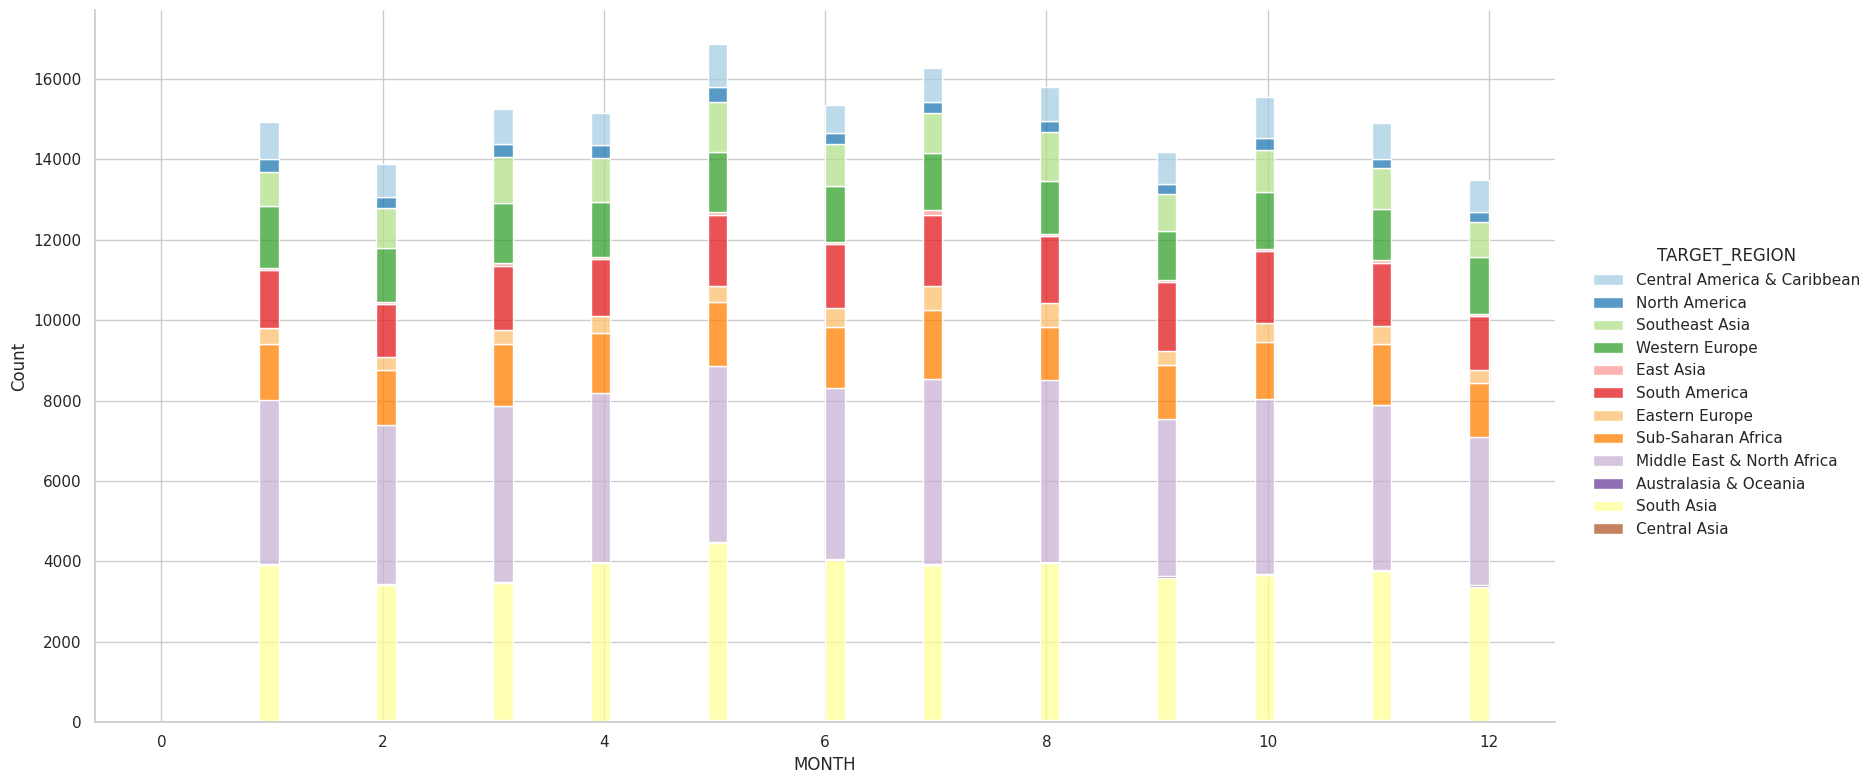

In [ ]:
sns.color_palette('Paired')

# Creating a distplot
sns.displot(data=dataset, x="MONTH", hue="TARGET_REGION", multiple="stack", height=8, aspect=2, palette = "Paired")


Attacks were almost equally distributed across all 12 months of a calendar year for all the regions. Hence we cannot say that number of attacks have any seasonal effects.

#........................................................................................................................................................................................................................................................................................................

### 8) Which target type was the most affected in all these attacks made over 47 years.?

Simple Barplot is used for data visualization.

<ipython-input-39-b3354f5c841e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  mx.set_xticklabels(mx.get_xticklabels(), rotation=90)


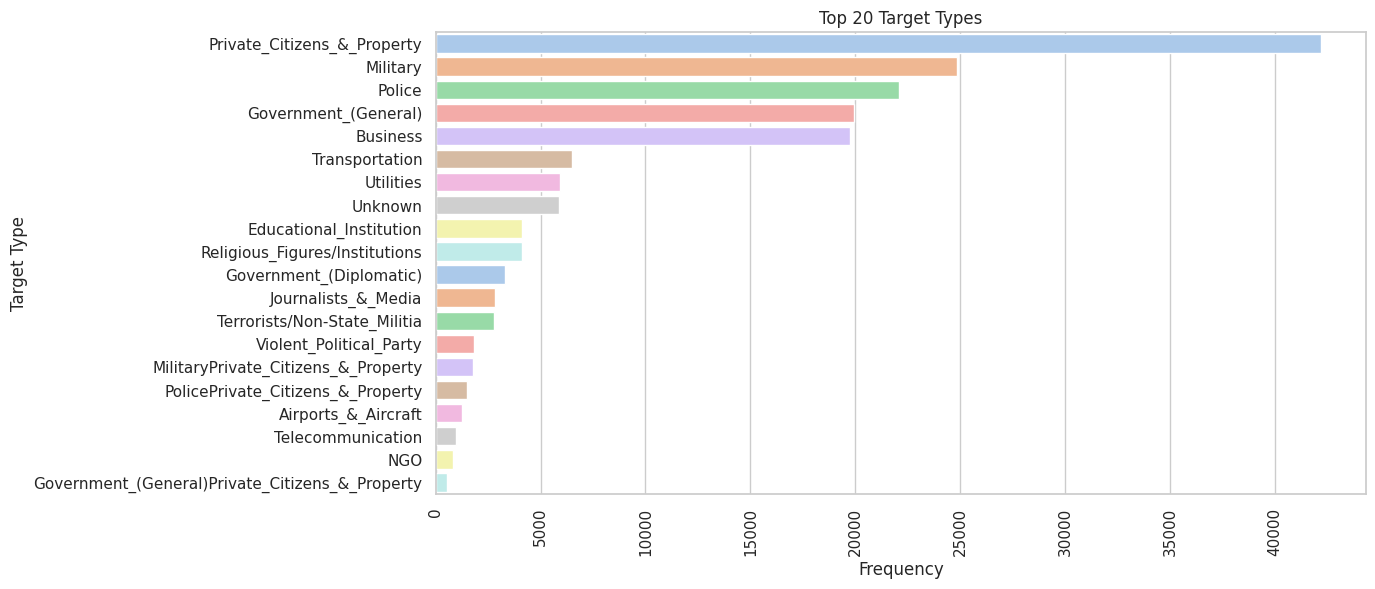

In [ ]:
import seaborn as sns

# Filter the top 20 target types
target_type = dataset[['TARGET']].value_counts().reset_index()
target_type['TARGET'] = target_type['TARGET'].str.replace(' ', '_')
target_type_filtered=target_type.head(20)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a barplot using Seaborn
mx = sns.barplot(x=0, y='TARGET', data=target_type_filtered,palette='pastel')

# Set the title and axes labels
mx.set_title("Top 20 Target Types")
mx.set_xlabel("Frequency")
mx.set_ylabel("Target Type")
mx.set_xticklabels(mx.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


#........................................................................................................................................................................................................................................................................................................

### 9) Comparing the total number of killings caused by each attack type to the average number of killings in each attack of a single attack type. This approach provides a useful way of assessing the relative lethality of different attack types and can aid in identifying trends or patterns in terrorist tactics.

Stackplot is used for visualization.

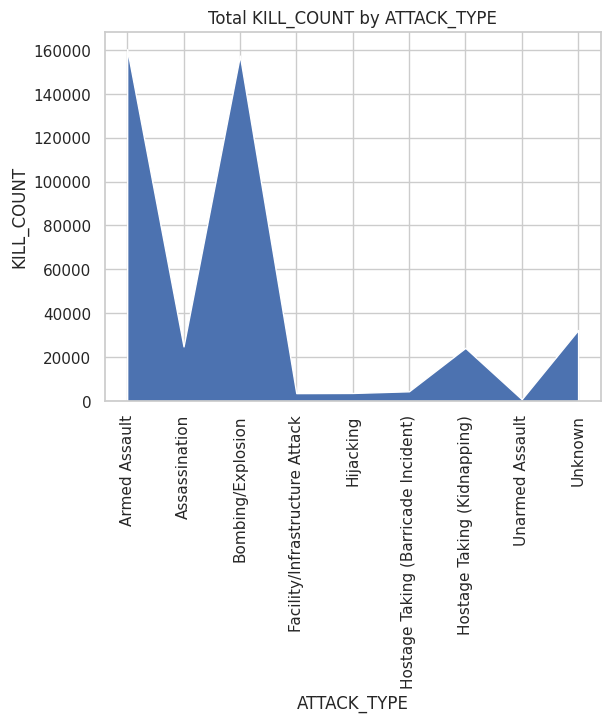

In [ ]:
import matplotlib.pyplot as plt

# Group the data by ATTACK_TYPE and sum the KILL_COUNT
ss = dataset.groupby('ATTACK_TYPE')['KILL_COUNT'].sum()

# Create the stackplot
plt.stackplot(ss.index, ss.values, labels=ss.index)

# Add a legend and labels

plt.xlabel('ATTACK_TYPE')
plt.ylabel('KILL_COUNT')
plt.title('Total KILL_COUNT by ATTACK_TYPE')
plt.xticks(rotation=90)
# Show the plot
plt.show()


#.............................................................................................

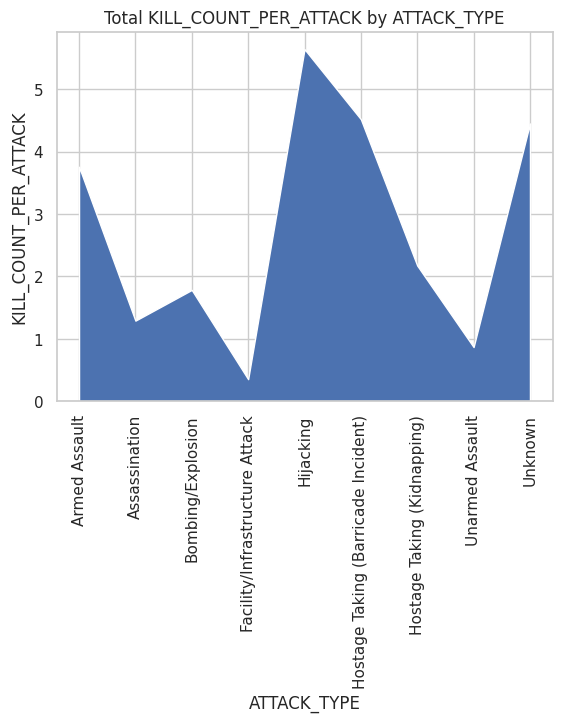

In [ ]:
import matplotlib.pyplot as plt

# Group the data by ATTACK_TYPE and sum the KILL_COUNT
ss1 = dataset.groupby('ATTACK_TYPE')['KILL_COUNT'].mean()

# Create the stackplot
plt.stackplot(ss1.index, ss1.values, labels=ss1.index)

# Add a legend and labels

plt.xlabel('ATTACK_TYPE')
plt.ylabel('KILL_COUNT_PER_ATTACK')
plt.title('Total KILL_COUNT_PER_ATTACK by ATTACK_TYPE')
plt.xticks(rotation=90)
# Show the plot
plt.show()


### Among Attack types, hijacking and hostage takings have caused the highest average of casualties per attack.

#........................................................................................................................................................................................................................................................................................................

## **Few more comparisons were conducted during the making of the project :**
*  Victims Nationality VS Target Country
*  No. of attacks vs Success rate
*  Weaponry vs Attack_type


##  **CONCLUSION** :

Terrorism is a complex issue that can be attributed to a variety of factors. Some of these factors include fake news, social media, education, cost of living, government policies, and more. In addition to these factors, research suggests that loneliness, delinquency, and exposure to violent games and movies can also contribute to the rise of terrorism. To control terrorism and promote peace, governments should consider implementing policies that regulate the circulation of explosive materials and guns, monitor social media platforms for potential radicalization, invest in education and mental health programs, and address socioeconomic disparities.

Additionally, individuals can play a role in promoting peace by advocating for non-violent conflict resolution, promoting diversity and inclusivity, and supporting community-building initiatives. It is important to take a comprehensive and collaborative approach to address the complex issue of terrorism.